# U.S. Bank Failure Analysis 

Data: https://catalog.data.gov/dataset/fdic-failed-bank-list


The inspiration for project comes from my curiosity about recurring financial and economic problems especially after the recent 2008 recession. I will be focusing more on this period of the data from 2000-2017. The data set includes data going back to 1934 and shows the following values:

**1. Institution name and FIN number

**2. Charter type

**3. Location of headquarters (city and state)

**4. Effective date

**5. Insurance fund and certificate number

**6. Failure transaction type

**7. Total deposits and total assets last reported prior to failure (in thousands of dollars)


There are several challenges to this dataset. 

First, different periods will have to be excluded from different forms of analysis for instance:

Estimated cost of resolution (Data on estimated losses are not available for FDIC insured failures prior to 1986 or for FSLIC insured failures from 1934-88. The data in this period from 1934-88 can be included in all forms of interpretation except where estimated loss data is needed.
I will consider the failures after 1988 where data exists for estimated losses as significant.

Second, a large dataset with many values which values to consider, took some time. I focused on Instituion Name (not fin number),Charter Type,Location of headquarters (city and state), and Total deposits and total assets last reported prior to failure (in thousands of dollars)

Third, I believe that the correlation between other variables can be significant, but for the purposes of this project I limited the values considered although I would possibly consider Failure transaction type, effective data, and Insurance fund and certificate number when I have more of an understanding of what those values mean to me. I suspect these variables potentially hold a lot of interesting relationships to the banking industry in the USA. 


***



# Analytic Questions

1. How have institution failures changed over time; which institution is more likely to fail? 

2. How expensive were institution failures in each period relative to other periods?

3. Which states had the highest failures? Which state cost the federal government the most to resolve?

In [2]:
# Importing the necessary libraries to organize the data into a meaningful visual narrative
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading the banks.csv file stored in my desktop
banks = pd.read_csv('~/Desktop/Thinkful-Projects/banks.csv')
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 12 columns):
Financial Institution Number    2883 non-null float64
Institution Name                3484 non-null object
Institution Type                3484 non-null object
Charter Type                    3484 non-null object
Headquarters                    3484 non-null object
Failure Date                    3484 non-null object
Insurance Fund                  3484 non-null object
Certificate Number              2999 non-null float64
Transaction Type                3484 non-null object
Total Deposits                  3484 non-null int64
Total Assets                    3333 non-null float64
Estimated Loss (2015)           2509 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 326.7+ KB


In [4]:
#Calling up the top 5 banks to see how the data and its values are organized in a dataframe
banks.head()

,Financial Institution Number,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss (2015)
0,NaN,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",4/19/1934,FDIC,NaN,PAYOUT,1064,1435.0,NaN
1,NaN,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",5/28/1934,FDIC,NaN,PAYOUT,238,374.0,NaN
2,NaN,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,"LIMA, MT",7/18/1934,FDIC,NaN,PAYOUT,42,91.0,NaN
3,NaN,FLORENCE DEPOSIT BANK,COMMERCIAL BANK,STATE,"FLORENCE, IN",7/18/1934,FDIC,NaN,PAYOUT,69,105.0,NaN
4,NaN,BANK OF LEWISPORT,COMMERCIAL BANK,STATE,"LEWISPORT, KY",8/6/1934,FDIC,NaN,PAYOUT,68,81.0,NaN


In [5]:
# Printing out the values that define the data in each column of the dataframe 
banks.columns.values 

array(['Financial Institution Number', 'Institution Name',
       'Institution Type', 'Charter Type', 'Headquarters', 'Failure Date',
       'Insurance Fund', 'Certificate Number', 'Transaction Type',
       'Total Deposits', 'Total Assets', 'Estimated Loss (2015)'], dtype=object)

In [6]:
#Extracting out failure year city and state. 
banks['Failure Year']=banks['Failure Date'].apply(lambda x: int(x.split('/')[2]))
banks['City']=banks['Headquarters'].apply(lambda x:(x.split(',')[0]))
banks['State']=banks['Headquarters'].apply(lambda x:(x.split(', ')[1]))

In [7]:
#Examining how much missing data is present to futher clean the data
banks.isnull().sum()

Financial Institution Number    601
Institution Name                  0
Institution Type                  0
Charter Type                      0
Headquarters                      0
Failure Date                      0
Insurance Fund                    0
Certificate Number              485
Transaction Type                  0
Total Deposits                    0
Total Assets                    151
Estimated Loss (2015)           975
Failure Year                      0
City                              0
State                             0
dtype: int64

In [8]:
#Summary Statistics what do these convey what can I draw from this?
banks[['Total Deposits', 'Total Assets', 'Estimated Loss (2015)', 'Failure Year']].describe()

,Total Deposits,Total Assets,Estimated Loss (2015),Failure Year
count,3.484000e+03,3.333000e+03,2.509000e+03,3484.000000
mean,2.997762e+05,4.045884e+05,7.064435e+04,1985.213261
std,3.304676e+06,5.454873e+06,3.305872e+05,19.654791
min,0.000000e+00,1.400000e+01,-4.386000e+03,1934.000000
25%,1.229300e+04,1.505100e+04,3.852000e+03,1985.000000
50%,4.172100e+04,4.752300e+04,1.335400e+04,1989.000000
75%,1.562415e+05,1.734780e+05,4.458500e+04,1991.000000
max,1.882608e+08,3.070216e+08,1.243800e+07,2017.000000


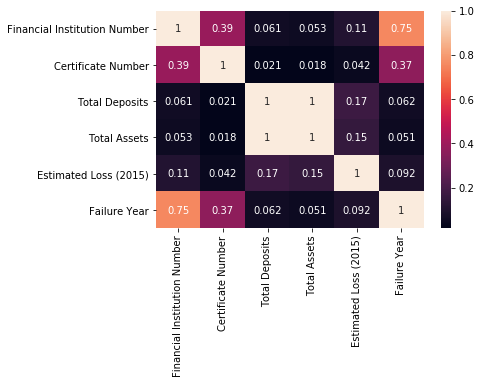

In [9]:
corr = banks[banks.columns].corr()
sns.heatmap(corr, annot = True)

# Analytic Question 1
##**How have bank failures changed over time; which institution is more likely to fail? Commercial Bank, Savings Association, Savings Bank?

In [10]:
# Grouping institutions by failure year and counting the amount failed in each year
banks.groupby('Failure Year')['Institution Name'].agg('count')

Failure Year
1934      9
1935     25
1936     69
1937     75
1938     74
1939     60
1940     43
1941     15
1942     20
1943      5
1944      2
1945      1
1946      1
1947      5
1948      3
1949      4
1950      4
1951      2
1952      3
1953      2
1954      2
1955      5
1956      2
1957      1
1958      4
1959      3
1960      1
1961      5
1962      1
1963      2
       ... 
1986    161
1987    217
1988    232
1989    530
1990    380
1991    268
1992    178
1993     50
1994     15
1995      8
1996      6
1997      1
1998      3
1999      8
2000      7
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    154
2011     92
2012     51
2013     24
2014     18
2015      7
2016      5
2017      2
Name: Institution Name, Length: 82, dtype: int64

In [18]:
banks.groupby(['Institution Type'])['Estimated Loss (2015)'].agg('mean')

Institution Type
COMMERCIAL BANK         41835.451513
SAVINGS ASSOCIATION    106485.405594
SAVINGS BANK           152847.254717
Name: Estimated Loss (2015), dtype: float64

In [11]:
# Grouping the institutions by charter type and counting the number of failed banks in each category
###Why are alot ofthe numbers the same below... maybe estimated loss bears more signifigance now?
banks.groupby('Institution Type').agg('count')

,Financial Institution Number,Institution Name,Charter Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss (2015),Failure Year,City,State
Institution Type,,,,,,,,,,,,,,
COMMERCIAL BANK,1913,2465,2465,2465,2465,2465,1982,2465,2465,2315,1619,2465,2465,2465
SAVINGS ASSOCIATION,644,691,691,691,691,691,691,691,691,691,572,691,691,691
SAVINGS BANK,326,328,328,328,328,328,326,328,328,327,318,328,328,328


Text(0,0.5,'Bank Failures')

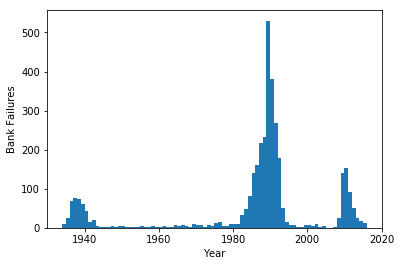

In [12]:
plt.hist(banks['Failure Year'], bins=range(1934,2017))
plt.xlabel('Year')
plt.ylabel('Bank Failures')

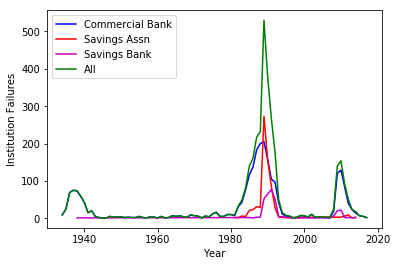

In [13]:
failure_year_type = banks.groupby(['Failure Year', 'Institution Type'], as_index=False)['Institution Name'].agg('count')
failure_year_type.columns=['Failure Year', 'Institution Type', 'Number of Failures']

failure_year_comm = failure_year_type[failure_year_type['Institution Type']=='COMMERCIAL BANK']
failure_year_savea = failure_year_type[failure_year_type['Institution Type']=='SAVINGS ASSOCIATION']
failure_year_saveb = failure_year_type[failure_year_type['Institution Type']=='SAVINGS BANK']


failure_year_all = failure_year_type[(failure_year_type['Institution Type']=='COMMERCIAL BANK') | (failure_year_type['Institution Type']=='SAVINGS ASSOCIATION') | (failure_year_type['Institution Type']=='SAVINGS BANK')]
failure_year_all = failure_year_all.groupby('Failure Year', as_index=False)['Number of Failures'].agg('sum')

plt.plot(failure_year_comm['Failure Year'], failure_year_comm['Number of Failures'], 'b-')
plt.plot(failure_year_savea['Failure Year'], failure_year_savea['Number of Failures'], 'r-')
plt.plot(failure_year_saveb['Failure Year'], failure_year_saveb['Number of Failures'], 'm-')
plt.plot(failure_year_all['Failure Year'], failure_year_all['Number of Failures'], 'g-')



plt.xlabel('Year')
plt.ylabel('Institution Failures')
plt.legend(['Commercial Bank', 'Savings Assn', 'Savings Bank', 'All'])



In [14]:
#creating a table that converts 2015 vals to 2017 vals
conversion_df = pd.read_csv('inflation.csv')
banks_inflation = pd.merge(banks, conversion_df, left_on='Failure Year', right_on='year')
banks_inflation.columns

Index(['Financial Institution Number', 'Institution Name', 'Institution Type',
       'Charter Type', 'Headquarters', 'Failure Date', 'Insurance Fund',
       'Certificate Number', 'Transaction Type', 'Total Deposits',
       'Total Assets', 'Estimated Loss (2015)', 'Failure Year', 'City',
       'State', 'year', 'inflation_multiplier'],
      dtype='object')

## Analytic Question 2 
###**Which institution cost the gov’t the most to resolve in each period individually and relative to others in that period and across periods?**

In the meantime, keep working on your second question and try to come up with a good story there.  From what I see in the current graph it looks like the biggest asset bank is always quite a bit removed from the rest.  

You could probably try to compute some summary stat about how big the largest bank was relative to second or how many banks underneath the first it takes for the total assets to be comparable.

Right now, I think your question 2 visualization is quite good. 

You will need to build in a bit of narrative around it and you will want to have some **summary statistics** explaining what is going on with this question and why it is interesting. 

Explaining things that the biggest failed bank is significantly larger than the next several banks combined is one way you can do this.
At a bare minimum, include just how bad this failure was compared to other failures during that period. Is 2x worse than the next biggest failure? 10x?

Since you have already seen the three big periods to failures, it might be cool to see how bad the worst failures of each period were in 2015 USD. Biggest number of failures were 80s, but it looks like 2000s cost the most? This would also make this question a lot more interesting.



(<matplotlib.axes._subplots.AxesSubplot at 0x10b5eaa20>,)

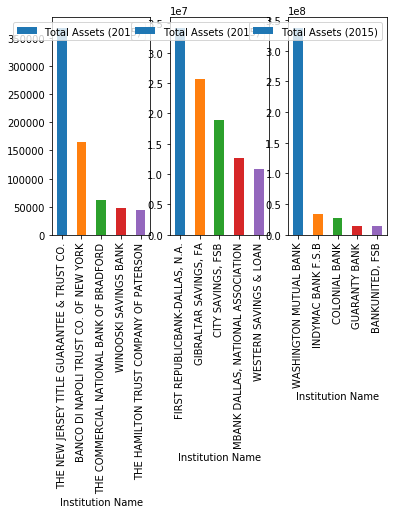

In [16]:
#Include another chart showing the failure of institution by the Institution Type as well
# Adjusting the banks for inflation for the range of three seperate periods of time.

# Then we sort the values by Institution Name and Total Assets (2015)
# Then we plot those values and compare the bar plots of each 
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier']
year_range_1 = range(1934, 1943)
year_range_2 = range(1980, 1990)
year_range_3 = range(2000, 2015)
banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)].sort_values('Total Assets (2015)', ascending=False).head(5)
banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)].sort_values('Total Assets (2015)', ascending=False).head(5)
banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)].sort_values('Total Assets (2015)', ascending=False).head(5)

fig, axes = plt.subplots(nrows=1, ncols=3)
banks_1.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[0]), 
banks_2.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[1]), 
banks_3.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[2]), 

The biggest asset bank is quite removed from the other banks 

Text(0.5,0,'')

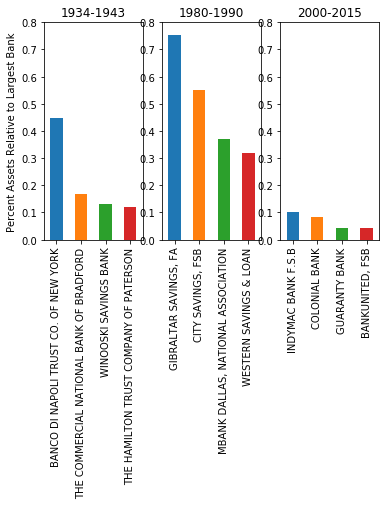

In [72]:
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier']
year_range_1 = range(1934, 1943)
year_range_2 = range(1980, 1990)
year_range_3 = range(2000, 2015)
banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)].sort_values('Total Assets (2015)', ascending=False).head(5)
#banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)].sort_values('Total Assets (2015)', ascending=False).iloc[1:5] 
banks_1['total_assets_normalized']=banks_1['Total Assets (2015)']/banks_1['Total Assets (2015)'].iloc[0]
banks_1 = banks_1.iloc[1:5]

banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)].sort_values('Total Assets (2015)', ascending=False).head(5)
#banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)].sort_values('Total Assets (2015)', ascending=False).iloc[1:5]
banks_2['total_assets_normalized']=banks_2['Total Assets (2015)']/banks_2['Total Assets (2015)'].iloc[0]
banks_2 = banks_2.iloc[1:5]


banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)].sort_values('Total Assets (2015)', ascending=False).head(5) 
#banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)].sort_values('Total Assets (2015)', ascending=False).iloc[1:5]
banks_3['total_assets_normalized']=banks_3['Total Assets (2015)']/banks_3['Total Assets (2015)'].iloc[0]
banks_3 = banks_3.iloc[1:5]

fig, axes = plt.subplots(nrows=1, ncols=3)
banks_1.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[0],legend=False, ylim=(0,.8),title='1934-1943')

banks_2.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[1],legend=False, ylim=(0,.8),title='1980-1990')


banks_3.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[2],legend=False, ylim=(0,.8),title='2000-2015')

axes[0].set_xlabel("")
axes[0].set_ylabel("Percent Assets Relative to Largest Bank")
axes[1].set_xlabel("")
axes[2].set_xlabel("")



In [17]:
# I have not idea why we're doing this...
banks['Failure Date'].unique()

array(['4/19/1934 ', '5/28/1934 ', '7/18/1934 ', ..., '9/23/2016 ',
       '1/13/2017 ', '1/27/2017 '], dtype=object)

In [39]:
banks.groupby(['Institution Type'])['Estimated Loss (2015)'].agg(['mean','count'])

,mean,count
Institution Type,,
COMMERCIAL BANK,41835.451513,1619
SAVINGS ASSOCIATION,106485.405594,572
SAVINGS BANK,152847.254717,318


In [53]:
banks_savings = banks_inflation[banks_inflation['Institution Type']=='SAVINGS BANK'].dropna(subset=['Estimated Loss (2015)'])


banks_savings_assn = banks_inflation[banks_inflation['Institution Type']=='SAVINGS ASSOCIATION'].dropna(subset=['Estimated Loss (2015)'])

banks_comm = banks_inflation[banks_inflation['Institution Type']=='COMMERCIAL BANK'].dropna(subset=['Estimated Loss (2015)'])

from scipy.stats import ttest_ind
t, p = ttest_ind(banks_savings['Estimated Loss (2015)'], banks_savings_assn['Estimated Loss (2015)'])
print(p)
t, p = ttest_ind(banks_savings['Estimated Loss (2015)'], banks_comm['Estimated Loss (2015)'])
print(p)
t, p = ttest_ind(banks_comm['Estimated Loss (2015)'], banks_savings_assn['Estimated Loss (2015)'])
print(p)

0.201356838072
1.18983338406e-07
1.70925266652e-12


## Analytic Question 3
###**Which states had the highest failures? Which state cost the federal government the most to resolve? How do these vary by geography?

Also, think a bit about what would be reasonable to do on your third question regarding states.

I think the same approach to question 2 can work well with question 3.  

I would suggest breaking out the data into the three major failure periods that we have identified.  You should be able to use almost the same code as question 2 to get the top 5 states with the largest number of failures and have nice plots/discussion around that.  There are going to be some obvious things that show up in the data, like that big states (CA, TX, FL) have lots of failures.  There will also be some unexpected things, like OK showing up as one of the larger failure states (not as many people, presumably less banks to begin with).  This kind of stuff will make for interesting analysis and discussion.

Main thing now is to make your last two questions compelling, build up lots of narrative, visualizations, and summary stats.

In [73]:
len(banks)

3484

So there are 3,484 financial institutions in this dataset. Which states had the highest failures? We'll delve into this question with the `State` variable in mind.

,State,Institution Name
44,TX,736
4,CA,236
14,IL,181
9,FL,178
37,OK,170


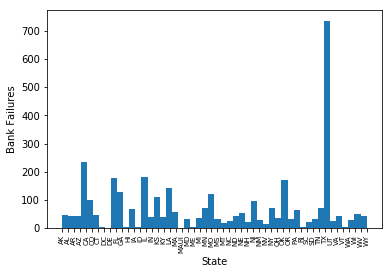

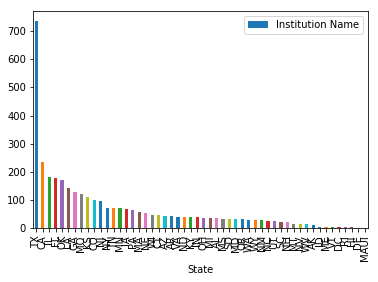

In [71]:
# We are plotting the histogram of the Bank Failures by State and printing the States with the top 5 banks failures  
plt.hist(banks['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('State')
plt.ylabel('Bank Failures')

banks_by_state = banks.groupby('State', as_index=False)['Institution Name'].agg('count').sort_values(by='Institution Name',ascending=False)
banks_by_state.plot.bar(x='State',y='Institution Name')
banks_by_state.sort_values(by='Institution Name', ascending=False).iloc[0:5]

Texas is the state with the largest amount of bank failures of any type and across all periods of time in the USA.
We now wonder what the losses were for some of these states across time. Here is where we consider the time from 1988-2017 as the context of the following data since there isn't data available pre 1988.

In [67]:
# Grouping the banks by State and the summation of their Estimated Loss (2015) data
##How to rank in highest to lowest
banks.groupby('State', as_index=False)['Estimated Loss (2015)'].agg('sum').sort_values(by='Estimated Loss (2015)',ascending=False)

,State,Estimated Loss (2015)
44,TX,38684926.0
4,CA,26625092.0
9,FL,16861759.0
10,GA,11806236.0
35,NY,5985362.0
14,IL,5937997.0
3,AZ,5734352.0
18,LA,5606330.0
1,AL,4606439.0
19,MA,4342477.0


,State,Estimated Loss (2015)
44,TX,647
4,CA,191
9,FL,158
14,IL,125
18,LA,121


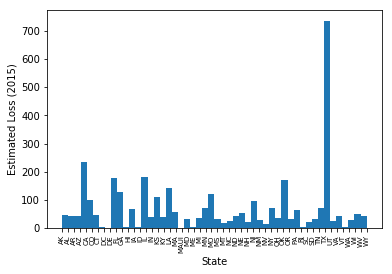

In [68]:
# Top five banks with estimated losses
#Is this redundent?
plt.hist(banks['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('State')
plt.ylabel('Estimated Loss (2015)')

banks_by_state = banks.groupby('State', as_index=False)['Estimated Loss (2015)'].agg('count')
banks_by_state.sort_values(by='Estimated Loss (2015)', ascending=False).iloc[0:5]